In [ ]:
import os
import git

# Clone the GitHub repository
repo_url = 'https://github.com/CiCiyeah/Replication-for-DOTE6635-project-1_YI-Jiaci_Wang-Yachong'
repo_dir = 'Replication-for-DOTE6635-project-1_YI-Jiaci_Wang-Yachong/DOTE6635'

if not os.path.exists(repo_dir):
    git.Git().clone(repo_url)

# Change the current working directory to the cloned repository
os.chdir(repo_dir)

print("当前工作目录:", os.getcwd())

Mounted at /drive
当前工作目录: /drive/My Drive/DOTE6635


In [ ]:
import pandas as pd

# Specify the encoding when reading the CSV file
catagory = pd.read_csv('catagory.csv', encoding='gbk')  # Try 'gbk' or 'latin-1' if 'gbk' doesn't work

# Get the number of rows and columns.
num_rows = catagory.shape[0]
num_cols = catagory.shape[1]

print(f"The 'catagory' DataFrame has {num_rows} rows and {num_cols} columns.")

# Get data types of each column.
print("\nData types of each column:")
print(catagory.dtypes)

# Display the first few rows of the DataFrame.
print("\nFirst few rows of the DataFrame:")
print(catagory.head())

The 'catagory' DataFrame has 40 rows and 3 columns.

Data types of each column:
Category     object
Product      object
Price($)    float64
dtype: object

First few rows of the DataFrame:
                   Category  \
0                FruitJuice   
1               FruitDrinks   
2  BabyMilkandMilkFlavoring   
3                      Soup   
4           CatFood-WetType   

                                             Product  Price($)  
0  Capri Sun Variety Pack with Fruit Punch, Straw...      9.43  
1  Kool Aid Jammers Variety Pack with Tropical Pu...      7.27  
2  Horizon Organic Shelf-Stable Whole Milk Boxes,...     13.98  
3  Maruchan Ramen Noodle Chicken Flavor Soup, 3 O...      9.97  
4  Purina Fancy Feast Chicken Feast Classic Grain...      0.88  


In [ ]:
import pandas as pd
import numpy as np

# 读取CSV文件
catagory = pd.read_csv('catagory.csv', encoding='gbk')

# 提取价格列作为regular_price
regular_price = catagory['Price($)']

# 定义乘数
multipliers = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])

# 计算prices矩阵
prices = np.outer(regular_price, multipliers)

# 初始化prompts字符串
prompts = []

# 生成并合并prompt
for i in range(len(catagory)):
    category = catagory.loc[i, 'Category']
    product = catagory.loc[i, 'Product']
    regular_price_value = regular_price[i]
    prices_vector = prices[i]

    prompt = f"""
    Survey details:
    - Population: Respondents recruited from Prolific, with a premium paid to obtain a representative
    sample of the US population. Each respondent answered one purchase intention question per
    product, with prices randomly drawn for each product and the order of products randomized across
    respondent. - Size: 1000 participants
    - Regular price: {regular_price_value}
    - Treatment: Each respondent answered one purchase intention question per product, with prices
    randomly drawn from a set of potential prices. The respondent was not informed of the set of prices.
    They only see one price per product.
    - Set of Prices: {prices_vector}
    Here are the key variables for the product in question:
    ⟨category⟩{category}⟨category⟩
    ⟨product⟩{product}⟨product⟩
    The survey question posed to participants is: “Please consider the following product category:
    {category}. Suppose you are in a grocery store, and you see the following product in that category:
    {product}. The product is currently priced at (price)(randomly drawn from a set of potential prices). Would you or would you not purchase
    the product?”
    Provide your prediction of the purchase probability at each price point in this format:
    [value1],[value2],...
    Where each value is between 0 and 1, representing the probability of purchase at the corresponding a price in the Set of Prices.
    Only return these comma separated values of these purchase probabilities(which means 11 numbers), without any extra text.
    """

    prompts.append(prompt)



In [ ]:
prompts[0]


'\n    Survey details:\n    - Population: Respondents recruited from Prolific, with a premium paid to obtain a representative\n    sample of the US population. Each respondent answered one purchase intention question per\n    product, with prices randomly drawn for each product and the order of products randomized across\n    respondent. - Size: 1000 participants\n    - Regular price: 9.43\n    - Treatment: Each respondent answered one purchase intention question per product, with prices\n    randomly drawn from a set of potential prices. The respondent was not informed of the set of prices.\n    They only see one price per product.\n    - Set of Prices: [ 0.     1.886  3.772  5.658  7.544  9.43  11.316 13.202 15.088 16.974\n 18.86 ]\n    Here are the key variables for the product in question:\n    ⟨category⟩FruitJuice⟨category⟩\n    ⟨product⟩Capri Sun Variety Pack with Fruit Punch, Strawberry Kiwi & Pacific Cooler Juice Box Pouches, 30 ct Box, 6 fl oz Pouches⟨product⟩\n    The survey 

In [ ]:
import openai

# 这里填入你从第三方 API 平台获得的 Key
api_key = "sk-HjJ58EBg7XCvQI5Y1qykiQrAUDS1Tx2g82DkPxTRpxcHSSfi"

# 这里填入中转 API 平台提供的 API 地址，例如 "https://api.xiaoding.pro/v1"
base_url = "https://xdaicn.top/v1"

# 设置 OpenAI API 客户端
client = openai.OpenAI(
    api_key=api_key,
    base_url=base_url
)

# 发送请求
response = client.chat.completions.create(
    model="gpt-4o-mini",  # 具体模型要看第三方平台支持哪些
    messages=[{"role": "system", "content": "You are an AI assistant."},
              {"role": "user", "content": "Hello, how are you?"}],
    temperature=1
)

print(response.choices[0].message.content)


Hello! I'm just a program, but I'm here and ready to help you. How can I assist you today?


In [ ]:
import pandas as pd
import numpy as np

# 读取CSV文件
catagory = pd.read_csv('catagory.csv', encoding='gbk')

# 提取价格列作为regular_price
regular_price = catagory['Price($)']

# 定义乘数
multipliers = np.array([0.0, 0.2, 0.4, 0.6, 0.8,1.0, 1.2, 1.4, 1.6, 1.8, 2.0])

# 计算prices矩阵
prices = np.outer(regular_price, multipliers)

# 初始化prompts字符串
prompts = []

# 生成并合并prompt
for i in range(len(catagory)):
    category = catagory.loc[i, 'Category']
    product = catagory.loc[i, 'Product']
    regular_price_value = regular_price[i]
    prices_vector = prices[i]

    prompt = f"""
    Survey details:
    - Population: Respondents recruited from Prolific, with a premium paid to obtain a representative
    sample of the US population. Each respondent answered one purchase intention question per
    product, with prices randomly drawn for each product and the order of products randomized across
    respondent. - Size: 1000 participants
    - Regular price: {regular_price_value}
    - Treatment: Each respondent answered one purchase intention question per product, with prices
    randomly drawn from a set of potential prices. The respondent was not informed of the set of prices.
    They only see one price per product.
    - Set of Prices: {prices_vector}
    Here are the key variables for the product in question:
    ⟨category⟩{category}⟨category⟩
    ⟨product⟩{product}⟨product⟩
    The survey question posed to participants is: “Please consider the following product category:
    {category}. Suppose you are in a grocery store, and you see the following product in that category:
    {product}. The product is currently priced at (price)(randomly drawn from a set of potential prices). Would you or would you not purchase
    the product?”
    Provide your prediction of the purchase probability at each price point in prthis format:
    [value1],[value2],...
    Where each value is between 0 and 1, representing the probability of purchase at the corresponding a price in the Set of Prices.
    Only return these comma separated values of these purchase probabilities(numbers), without any extra text.
    """

    prompts.append(prompt)





In [ ]:
def ask_gpt(prompts):
    responses = []

    for prompt_index, prompt in enumerate(prompts[:]):
        print(f"Sending prompt {prompt_index + 1}...")  # Display which prompt is being processed

        for i in range(1):  # Send each prompt 50 times
            response = client.chat.completions.create(
                model="deepseek-v3",  # Use the GPT-4 mini model
                messages=[
                    {"role": "system", "content": "You are an AI expert in consumer behavior. Your task is to predict the results of the survey experiments provided by the User. Only return the answers in comma separated values, without any extra text."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0,  # Set temperature to 1
                max_tokens=1000  # Adjust max_tokens if needed
            )

            # Correct way to access the content from the response
            response_content  = response.choices[0].message.content

            # Store all responses in a list
            responses.append(response_content)

    return responses

# Example usage
responses = ask_gpt(prompts)


Sending prompt 1...
Sending prompt 2...
Sending prompt 3...
Sending prompt 4...
Sending prompt 5...
Sending prompt 6...
Sending prompt 7...
Sending prompt 8...
Sending prompt 9...
Sending prompt 10...
Sending prompt 11...
Sending prompt 12...
Sending prompt 13...
Sending prompt 14...
Sending prompt 15...
Sending prompt 16...
Sending prompt 17...
Sending prompt 18...
Sending prompt 19...
Sending prompt 20...
Sending prompt 21...
Sending prompt 22...
Sending prompt 23...
Sending prompt 24...
Sending prompt 25...
Sending prompt 26...
Sending prompt 27...
Sending prompt 28...
Sending prompt 29...


KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Assuming 'responses' is the list of strings you got from the previous code
# Create a DataFrame from the list of strings
df_responses = pd.DataFrame({'response': responses})

# Save the DataFrame to a CSV file with UTF-8 encoding
# df_responses.to_csv('defineyourname.csv', encoding='utf-8', index=False)
# please write your own csv name if you want to write.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 读取CSV文件
responses = pd.read_csv('responses.csv')

responses.iloc[:, 0] = responses.iloc[:, 0].apply(lambda x: re.sub(r'[^0-9.,]', '', x))
# 将第一列数据的每一行按照逗号分割拆成数组
first_column_arrays = responses.iloc[:, 0].apply(lambda x: x.split(','))

# 将数组转换为数值类型
first_column_arrays = first_column_arrays.apply(lambda x: list(map(float, x)))

# 检查每一行是否为11个数，若不是则由上一行代替
for i in range(1, len(first_column_arrays)):
    if len(first_column_arrays[i]) != 11:
        first_column_arrays[i] = first_column_arrays[i-1]

# 将数据转换为DataFrame以便计算每一列的平均值
df = pd.DataFrame(first_column_arrays.tolist())

# 计算每一列的平均值
column_means1 = df.mean(axis=0)

# 读取CSV文件
responses2 = pd.read_csv('responses2.csv')

responses2.iloc[:, 0] = responses2.iloc[:, 0].apply(lambda x: re.sub(r'[^0-9.,]', '', x))
# 将第一列数据的每一行按照逗号分割拆成数组
first_column_arrays = responses2.iloc[:, 0].apply(lambda x: x.split(','))

# 将数组转换为数值类型
first_column_arrays = first_column_arrays.apply(lambda x: list(map(float, x)))

# 检查每一行是否为11个数，若不是则由上一行代替
for i in range(1, len(first_column_arrays)):
    if len(first_column_arrays[i]) != 6:
        first_column_arrays[i] = first_column_arrays[i-1]

# 将数据转换为DataFrame以便计算每一列的平均值
df = pd.DataFrame(first_column_arrays.tolist())

# 计算每一列的平均值
column_means2 = df.mean(axis=0)

# 读取CSV文件
responses3 = pd.read_csv('responses3.csv')

responses3.iloc[:, 0] = responses3.iloc[:, 0].apply(lambda x: re.sub(r'[^0-9.,]', '', x))
# 将第一列数据的每一行按照逗号分割拆成数组
first_column_arrays = responses3.iloc[:, 0].apply(lambda x: x.split(','))

# 将数组转换为数值类型
first_column_arrays = first_column_arrays.apply(lambda x: list(map(float, x)))

# 检查每一行是否为11个数，若不是则由上一行代替
for i in range(1, len(first_column_arrays)):
    if len(first_column_arrays[i]) != 6:
        first_column_arrays[i] = first_column_arrays[i-1]

# 将数据转换为DataFrame以便计算每一列的平均值
df = pd.DataFrame(first_column_arrays.tolist())

# 计算每一列的平均值
column_means3 = df.mean(axis=0)
column_means1
column_means2
column_means3


TypeError: read_csv() takes 1 positional argument but 2 were given

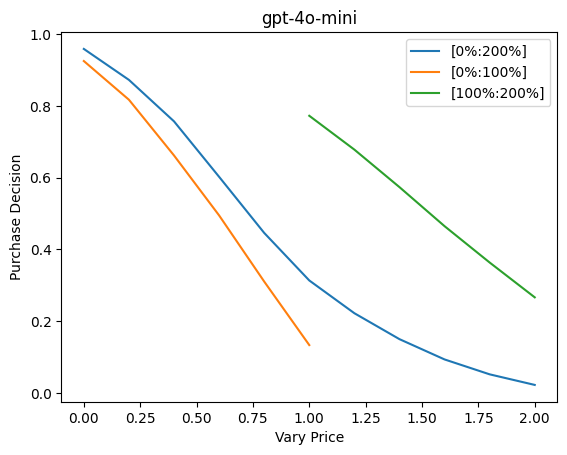

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义变量
vary_price = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])

# 绘制数据
plt.plot(vary_price, column_means1, label='[0%:200%]')
plt.plot(vary_price[:6], column_means2, label='[0%:100%]')
plt.plot(vary_price[5:], column_means3, label='[100%:200%]')

# 添加标签和标题
plt.xlabel('Vary Price')
plt.ylabel('Purchase Decision')
plt.title('gpt-4o-mini')
plt.legend()

# 显示图表
plt.show()
